Python Final Project<br>
Bingtao Zou; Patrick Lu, Victor Chen

Install and import all the necessary packages

In [19]:
!pip install tweepy
import tweepy
import time
import pandas as pd
import numpy
from TwitterCollector import TwitterCollector
from datetime import datetime
import pandas
!pip install nltk
import nltk
nltk.download('punkt')
import json
from pprint import pprint
from collections import Counter
from matplotlib import pyplot as plt
!pip install textblob
from textblob import TextBlob


[nltk_data] Downloading package punkt to /Users/louiszou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Initialize the twitter developer account token

In [2]:
bearer_token = r"AAAAAAAAAAAAAAAAAAAAAFZehQEAAAAA4pU%2Bfxa6UsKzFkNpyR2Kol95oYk%3DxTeV71bl9biVphpeuLkOhuHsWyu7p5ckaizzcJIQW5s9qaA9Ma"

tc = TwitterCollector(bearer_token = bearer_token)

Keyword Selection and Data Collection

A.1: Pick keyword

In [ ]:
query = 'USC'  # we picked USC as our keyword because two of our group members were from USC

A.2: Twitter collection

In [70]:
tc.fetch_recent_tweets(query = query  
                        , tweets_cnt = 10000  
                        , save_result = True
                        , end_time = datetime.fromisoformat('2022-10-01 00:00:00')
                        ) # Collect 10,000 recent tweets containing the keyword USC


In [ ]:
with open("recent_post_USC_10000.json") as json_file:
    recent_tweets = json.load(json_file) 

A.3: Get a list of unique author ids

In [71]:
pprint(recent_tweets.keys()) # check to see the keys in the recent_tweets dictionary
pprint(recent_tweets['tweets'][:3]) # print out the first three tweets

uniqueid = [] # initialize an empty list 
for t in recent_tweets['tweets']:
    if t['author_id'] not in uniqueid:
        uniqueid.append(t['author_id']) # append the author id if it's not already in the uniqueid list
    
len(uniqueid) # check how many unique author_ids there are 


dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])
[{'attachments': {'media_keys': ['3_1575998853026914307']},
  'author_id': '231665936',
  'context_annotations': [{'domain': {'description': 'Categories within Brand '
                                                     'Verticals that narrow '
                                                     'down the scope of Brands',
                                      'id': '46',
                                      'name': 'Business Taxonomy'},
                           'entity': {'description': 'Brands, companies, '
                                                     'advertisers and every '
                                                     'non-person handle with '
                                                     'the profit intent and '
                                                     'related to foods & '
                                                     'beverages such as '
         

7340

A.4: Collect the information of all the authors 

In [ ]:
author_info = [] # create an empty list to contain all the author information

In [148]:
for a in range(0,len(uniqueid)):
    try:
        author_info.append(tc.fetch_author_info(uniqueid[a])) # fetch author info for each author in the list
        time.sleep(1) # prevent TooManyRequests
        print(a) # print the counter to see how far we got because this takes a long time
    except tweepy.TooManyRequests:
        print('TooManyRequests')
        time.sleep(900) # code from piazza to sleep for 15 minutes if it encounters a toomanyrequests https://piazza.com/class/l6361peonhd70r/post/200
    except AttributeError:
        pass # circumvent the nonetype error
    


{'description': '今日神様が2回欠伸した。飼育小屋のニワトリは大声で喚いた。舗装路に百円玉が落ちそれを拾ったワンピースと麦わら帽子は恋に落ちた。好きなものばかりの世界はつまらない。けれど嫌いなものばかりの世界は辛すぎる。神様だってたまには気まぐれを起こす。だから死なない七面鳥に大統領が微笑む。 @MitsunoRate ←色欲強欲サブ垢', 'id': '59849350', 'public_metrics': {'followers_count': 223, 'following_count': 1218, 'tweet_count': 97519, 'listed_count': 6}, 'location': '地球圏', 'username': 'elu08', 'name': '零れのふ', 'verified': False, 'created_at': '2009-07-24T18:19:22.000Z'}
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692


7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320


Preliminary Analysis

B.1: 10 most common words with and without stopwords

In [153]:
with open('recent_post_USC_10000.json') as infile:
    data = json.load(infile)
words = []
for t in data['tweets']:
    words.extend(t['text'].split()) # create a list of all the words in the tweet texts

print(len(words)) # see how many words there are in total


229756


In [154]:
c = Counter(words)
c.most_common(10) # see the 10 most common words in the tweets with stop words

[('the', 5283),
 ('RT', 5278),
 ('USC', 4359),
 ('and', 3700),
 ('to', 3632),
 ('a', 3232),
 ('of', 2851),
 ('is', 2455),
 ('for', 2147),
 ('this', 2018)]

In [155]:
stopwords = nltk.corpus.stopwords.words('english')
words2 = [] 
stopwords.extend(['RT','sr','br','it.','This','That','The','&amp;','Why']) # add to the stopwords list some of the frequent meaningless words that appeared in the tweets
for w in words:
    if w not in stopwords and len(w) > 1 and not w.startswith('https'):
        words2.append(w) # create a new list of words for words that are not in the stopwords list 
print(len(words2))       
c2 = Counter(words2)
c2.most_common(50) # see the most common words without the stop words



155054


[('USC', 4359),
 ('team', 1287),
 ('literally', 892),
 ('people', 629),
 ('women', 618),
 ('getting', 606),
 ('State', 599),
 ('#USC', 579),
 ('show', 562),
 ('Black', 529),
 ('national', 526),
 ('attention', 514),
 ('type', 503),
 ('exactly', 502),
 ('y’all', 502),
 ('de', 496),
 ('@StevieDwayne:', 490),
 ('mimicki…', 490),
 ('gave', 466),
 ('didn’t', 463),
 ('game', 422),
 ('Jennifer', 421),
 ('Hudson', 421),
 ('@LaShea2019:', 386),
 ('Fisk', 386),
 ('University’s', 386),
 ('gymnastics', 386),
 ('$25k', 386),
 ('ackno…', 386),
 ('Oregon', 326),
 ('first', 299),
 ('Iwuchukwu', 287),
 ('like', 285),
 ('Vince', 283),
 ('football', 277),
 ('Arizona', 274),
 ('vs', 264),
 ('No.', 255),
 ('usc', 247),
 ('HBCU', 241),
 ('USC,', 240),
 ('dance', 236),
 ('USC.', 233),
 ('make', 231),
 ('cardiac', 231),
 ('one', 231),
 ('He', 225),
 ('arrest', 223),
 ('college', 221),
 ('get', 218)]

B.2: 10 most popular hashtags

In [156]:
hashtag = []

for w in words:
    if w.startswith('#') and len(w) > 1:
        hashtag.append(w) # find all the words that starts with a # and store them in a list
    
print(len(hashtag))
c3 = Counter(hashtag)
c3.most_common(10) # see the most common hashtags

4709


[('#USC', 579),
 ('#FightOn', 99),
 ('#Fighton', 71),
 ('#BREAKING:', 62),
 ('#Gophers', 50),
 ('#durabarrierscam.', 46),
 ('#WhiteCollarCrime', 46),
 ('#bernarddelvaux', 46),
 ('#PerfectCrime.', 46),
 ('#BullsNation', 45)]

B.3: 10 most mentioned user names

In [157]:
names = []

for w in words:
    if w.startswith('@') and len(w) > 1:
        names.append(w) # find all users that appeared in the tweets by finding words that starts with an @
    
c3 = Counter(names)
c3.most_common(10) # see the most frequently mentioned names

[('@StevieDwayne:', 490),
 ('@LaShea2019:', 386),
 ('@USC', 147),
 ('@LincolnRiley', 146),
 ('@TendentiousG:', 140),
 ('@CoachDee_USC', 123),
 ('@Scott_Schrader:', 118),
 ('@Scott_Schrader', 115),
 ('@CBSSports', 112),
 ('@CFBONFOX', 112)]

B.4: Most common sources of tweets

In [158]:
source = []
for s in recent_tweets['tweets']:
    source.append(s['source']) # create a list of the sources to all the tweets in the data set by using the 'source' in recent_tweets['tweets']

c4 = Counter(source)
c4.most_common(3) # find the 3 most common sources for tweets


[('Twitter for iPhone', 4985),
 ('Twitter Web App', 1994),
 ('Twitter for Android', 1719)]

B.5: Create a line chart to show the time trend of tweet count 

In [159]:
df = pd.DataFrame(recent_tweets['tweets']) # convert recent_tweets['tweets'] into a data frame for analysis
df.head() 


,possibly_sensitive,entities,lang,public_metrics,edit_history_tweet_ids,author_id,attachments,text,context_annotations,source,created_at,id,referenced_tweets,in_reply_to_user_id,geo
0,False,"{'urls': [{'start': 108, 'end': 131, 'url': 'https://t.co/X9taIA7GHO', 'expanded_url': 'https://insight.jci.org/articles/view/157714', 'display_url': 'insight.jci.org/articles/view/…', 'status': 200, 'title': 'Early life low-calorie sweetener consumption disrupts glucose regulation, sugar-motivated behavior, and memory function in rats', 'unwound_url': 'https://insight.jci.org/articles/view/157714'}, {'start': 139, 'end': 162, 'url': 'https://t.co/VLw2EFmLI9', 'expanded_url': 'https://dornsi...",en,"{'retweet_count': 5, 'reply_count': 1, 'like_count': 9, 'quote_count': 0}",[1575998872866127873],231665936,{'media_keys': ['3_1575998853026914307']},UCS: Low-calorie sugar substitute consumption during adolescence could impair memory later in life\nJournal: https://t.co/X9taIA7GHO\nPress: https://t.co/VLw2EFmLI9 @ToshiyukiHorie https://t.co/gFISKLgZuZ,"[{'domain': {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}, 'entity': {'id': '1557696888568045569', 'name': 'Food & Beverage Business', 'description': 'Brands, companies, advertisers and every non-person handle with the profit intent and related to foods & beverages such as snacks, soft drinks, beers.'}}]",Twitter Web App,2022-09-30T23:59:46.000Z,1575998872866127873,NaN,NaN,NaN
1,False,"{'annotations': [{'start': 48, 'end': 50, 'probability': 0.6192, 'type': 'Organization', 'normalized_text': 'USC'}], 'mentions': [{'start': 3, 'end': 19, 'username': 'iam_tylerparker', 'id': '1361090975637012488'}, {'start': 82, 'end': 91, 'username': 'CoachNua', 'id': '475385297'}, {'start': 92, 'end': 105, 'username': 'LincolnRiley', 'id': '342909402'}, {'start': 106, 'end': 113, 'username': 'On3USC', 'id': '837393175341748224'}, {'start': 114, 'end': 129, 'username': 'Scott_Schrader', 'id...",en,"{'retweet_count': 41, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",[1575998818687991808],1394712563598860288,NaN,RT @iam_tylerparker: Excited to attend my first USC Game this weekend! #Fighton✌🏾 @CoachNua @LincolnRiley @On3USC @Scott_Schrader @DaGman7…,"[{'domain': {'id': '10', 'name': 'Person', 'description': 'Named people in the world like Nelson Mandela'}, 'entity': {'id': '872534931804635136', 'name': 'Lincoln Riley', 'description': 'Lincoln Riley'}}, {'domain': {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}, 'entity': {'id': '1557697289971322880', 'name': 'Sports & Fitness Business', 'description': 'Brands, companies, advertisers and every non-person ha...",Twitter for iPhone,2022-09-30T23:59:33.000Z,1575998818687991808,"[{'type': 'retweeted', 'id': '1575987343017664512'}]",NaN,NaN
2,False,"{'annotations': [{'start': 22, 'end': 32, 'probability': 0.6821, 'type': 'Organization', 'normalized_text': 'K-pop Festa'}, {'start': 69, 'end': 71, 'probability': 0.4757, 'type': 'Organization', 'normalized_text': 'USC'}, {'start': 104, 'end': 110, 'probability': 0.9271, 'type': 'Person', 'normalized_text': 'Sejeong'}], 'urls': [{'start': 74, 'end': 97, 'url': 'https://t.co/03fK6VwdTM', 'expanded_url': 'https://www.uscannenbergmedia.com/2022/09/30/k-pop-festa-brings-the-korean-cultural-wave...",en,"{'retweet_count': 76, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",[1575998733342298112],1415055520960946176,NaN,"RT @sejeong_news: [📰]K-pop Festa brings the Korean cultural wave to USC\n▶️https://t.co/03fK6VwdTM\n\n""As Sejeong sang her versatile set of so…","[{'domain': {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}, 'entity': {'id': '1557696802391859201', 'name': 'Entertainment & Leisure Business', 'description': 'Brands, companies, advertisers and every non-person

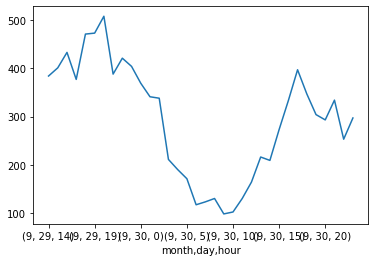

In [160]:
df['times'] = pd.to_datetime(df['created_at'])
df['month'] = df['times'].dt.month
df['day'] = df['times'].dt.day
df['hour'] = df['times'].dt.hour # convert times into three columns containing month, day, and hour respectively
df.groupby([df['month'], df['day'], df['hour']]).id.count().plot()
plt.rc('xtick', labelsize = 10)

B.6: 3 most influential tweets

In [215]:
df = pd.DataFrame(recent_tweets['tweets'])    
influence = []
for i in df['public_metrics']:
    influence.append(sum(i.values())) # calculate influence as the sum of all the public metrics

df['influence'] = influence
df.sort_values(by = ['influence'], inplace = True, ascending = False)
pd.options.display.max_colwidth = 1000
pprint(df.iloc[0:3]['text'])

2822                                        RT @FootbaIIism: Kids today will never understand how insane USC Reggie bush was\n https://t.co/m4gSO1hL6B
9549                                        RT @FootbaIIism: Kids today will never understand how insane USC Reggie bush was\n https://t.co/m4gSO1hL6B
1418    RT @SportsCenter: Remember that time Vince Young took it to the house against USC for a title?\n\nOnly 10 days til CFB is back. https://t.co/…
Name: text, dtype: object


B.7: 3 most vocal authors

In [162]:
voc = df.groupby([df['author_id']]).id.count()
voc.sort_values(inplace = True, ascending = False)
for i in voc.head(3).index:
    pprint(tc.fetch_author_info(i))

{'created_at': '2008-11-01T18:54:04.000Z',
 'description': 'Fan, alumnus, not affiliated with the USC athletic program, '
                'not a season ticket holder, booster, or agent. #FightOn\n'
                'Most product links are affiliate offerings.',
 'id': '17103965',
 'location': 'SoCal',
 'name': 'USC Football News',
 'public_metrics': {'followers_count': 27714,
                    'following_count': 814,
                    'listed_count': 316,
                    'tweet_count': 43046},
 'username': 'USCFootballNews',
 'verified': False}
{'created_at': '2022-05-25T21:34:09.000Z',
 'description': '',
 'id': '1529576463460179968',
 'location': 'Dortmund, NRW, Deutschland ',
 'name': 'moertelpumpe',
 'public_metrics': {'followers_count': 0,
                    'following_count': 6,
                    'listed_count': 0,
                    'tweet_count': 6928},
 'username': 'moertelpumpe',
 'verified': False}
{'created_at': '2012-12-31T22:14:18.000Z',
 'description': 'Varsit

B.8: 3 most influential authors

In [195]:
unique_author = []
uniqueid = [] 
for i in range(0, len(author_info)):
    try:
        if author_info[i]['id'] not in uniqueid:
            unique_author.append(author_info[i]) 
            uniqueid.append(author_info[i]['id']) # attach the user id to the unique id list if it's not already in there
    except TypeError:
        continue # avoid the null entries in the data set
# this step is to avoid double counting the authors, because an author might appear twice if it's public metrics changed during the collection period
print(len(unique_author))

{'created_at': '2010-12-29T04:11:15.000Z',
 'description': 'Lifestyle Medicine, Speaker & Clinician, author of Pandemic '
                'Busters\n'
                '\n'
                'Clínico de medicina de estilo de vida, orador y autor de Los '
                'Destructores de Pandemia.',
 'id': '231665936',
 'location': 'Pennsylvania',
 'name': 'Dr. Eddie Ramirez',
 'public_metrics': {'followers_count': 2200,
                    'following_count': 72,
                    'listed_count': 38,
                    'tweet_count': 17317},
 'username': 'EddieRDMD',
 'verified': False}
7230


In [201]:
metric = []
for i in unique_author:
    m = 0
    m += i['public_metrics']['followers_count']
    m += i['public_metrics']['following_count']
    m += i['public_metrics']['listed_count']
    m += i['public_metrics']['tweet_count'] # calculate the influence score for each author
    metric.append([i['username'], m]) 
    
d = pd.DataFrame(metric, columns = ['username','influence']) # convert the list of dictionaries into a data frame so it can be sorted
d.head()

,username,influence
0,EddieRDMD,19627
1,SpinnerAlmighty,22654
2,sunflowers531,9857
3,remrafDetroit,11273
4,HeyItsLiam,49045


In [216]:
d.sort_values(by = 'influence', inplace = True, ascending = False) # sort the authors by influence score to find the most influential authors
print(d[:5])

            username  influence
4581    japan_lawson  110128763
4591         suntory   21543016
6525  cas_2050001283   18603038
2888       UberFacts   13921324
1239        HuffPost   12049533


Word Cloud

In [247]:
!pip install wordcloud
from wordcloud import WordCloud

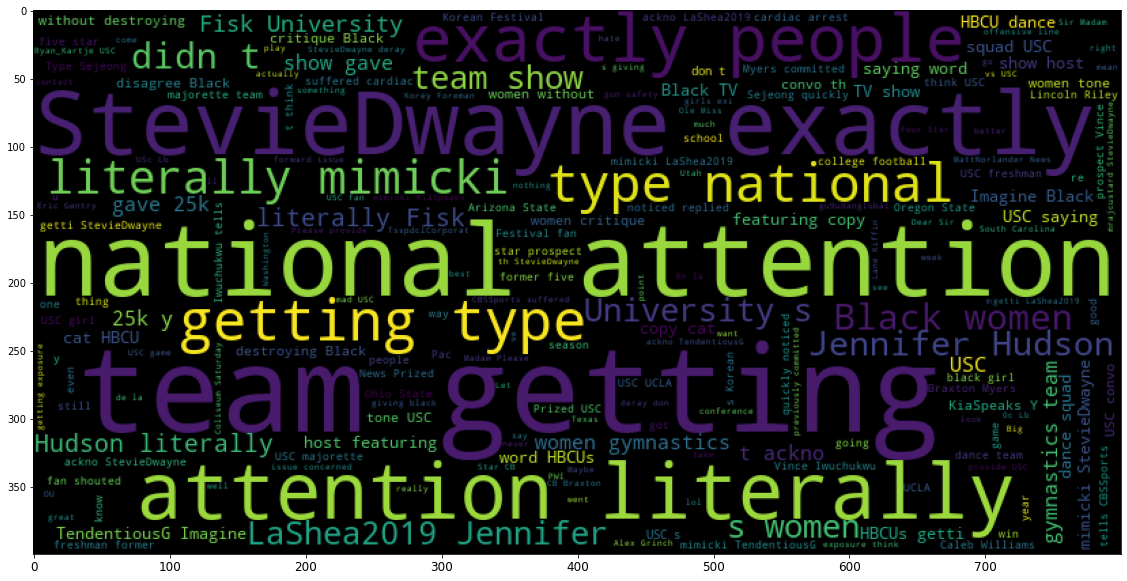

In [270]:
wd = ' '.join(words2) # put all the words in the tweets into a single string
wordcloud = WordCloud(width=800, height=400).generate(wd) # generate a word cloud with the words in the tweets

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show() 

Sentiment Analysis

In [100]:
pol = []
sub = [] # initialize two empty lists to contain polarity and subjectivity of the tweets respectively
for i in df['text']:
    pol.append(TextBlob(i).sentiment.polarity) 
    sub.append(TextBlob(i).sentiment.subjectivity) # attach the polarity and subjectivity of the tweets to respective lists

df['polarity'] = pol
df['subjectivity'] = sub # add the lists to the data frame

print(df['polarity'].mean()) 
print(df['subjectivity'].mean()) # print out the average polarity and subjectivity of the tweets

0.08388405016814811
0.2984474295190373


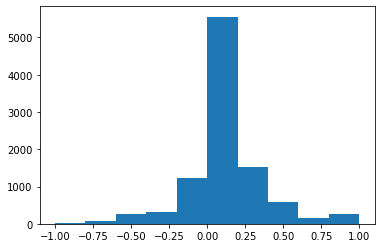

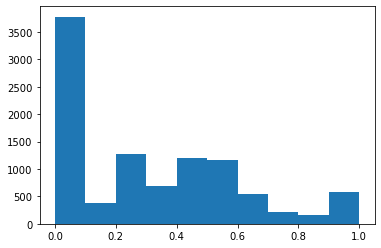

In [141]:
plt.hist(df['polarity'])
plt.show()
plt.hist(df['subjectivity'])
plt.show() # plot out two histograms showing the distribution of polarity and subjectivity respectively

In [135]:
df.sort_values(by = ['polarity'], inplace = True, ascending = False) # sort the data frame by polarity in a descending order
pprint(df.head(3).iloc[0:3, 7]) 
pprint(df.tail(3).iloc[0:3, 7]) # print out the 3 most positive tweets and 3 most negative tweets in the data

7346                                                         RT @Scott_Schrader: #USC Hosting Another Impressive Group of Visitors at the L.A. Coliseum Saturday (10/1)❕🔖 👀\n\nTwo Official Visitors ☑️\n\nT…
1277    USC vs. Arizona State prediction, odds, line: 2022 college football picks, Week 5 best bets from proven model https://t.co/Xsv2v2lEj9 ▶️ https://t.co/qwq5GEGtOp #OnlineBetting #SportsBetting #NCAAF
7822                                                         RT @Scott_Schrader: #USC Hosting Another Impressive Group of Visitors at the L.A. Coliseum Saturday (10/1)❕🔖 👀\n\nTwo Official Visitors ☑️\n\nT…
Name: text, dtype: object
4087    @TsspdclCorporat There is no electricity in dabirpura and when its coming, the fluctuation is terrible.\nUSC-110008729
5742                                                                                       @TreyWallace_ USC jr looks pathetic
2822                RT @FootbaIIism: Kids today will never understand how insane USC Reggie bush was\n